In [1]:
import sys
sys.path.append('C:/Users/320060820/experiments/')
import fxp_quantize
import model_data
import os
import pickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
save_path = 'C:/Users/320060820/experiments/outputs/Independent_Optimized_Search/'

In [9]:
acc_drop = {}
scores = {}
opt_params = {}
models = os.listdir(save_path)

In [10]:
mm = models[4:]
for m in mm:
    model_path = save_path + m + '/'
    for p in ['weights', 'biases', 'activations']:
        with open(model_path + 'acc_drop_' + p[0] + '.p', 'rb') as f:
            b = {p: pickle.load(f)}
            if m not in acc_drop:
                acc_drop[m] = b
            else:
                acc_drop[m] = {**acc_drop[m], **b}
        with open(model_path + 'opt_params_' + p[0] + '.p', 'rb') as f:
            b = {p: pickle.load(f)}
            if m not in opt_params:
                opt_params[m] = b
            else:
                opt_params[m] = {**opt_params[m], **b}
        with open(model_path + 'scores_' + p[0] + '.p', 'rb') as f:
            b = {p: pickle.load(f)}
            if m not in scores:
                scores[m] = b
            else:
                scores[m] = {**scores[m], **b}

In [11]:
scores.keys()

dict_keys(['Keras CIFAR10', 'Keras Fashion', 'Keras MNIST', 'Keras SVHN'])

In [6]:
def scores_as_list(scores, opt_params):
    s = []
    for layer in scores:
        s.append(scores[layer][opt_params[layer][0]][opt_params[layer][1]])
    return s

In [8]:
def plot_ind_acc_loss(scores, opt_params, model, width=0.9):

    plt.rcParams.update({'font.size': 12, 'font.weight':520})
    if model.startswith('Keras'):
        plt.figure(figsize=(12, 9))
    else:
        plt.figure(figsize=(15, 7))
    x = np.arange(1, 3.5*len(list(scores[model]['weights'].keys())) + 1, 3.5)
    ind_scores = {}
    for k in ['weights', 'biases', 'activations']:
        ind_scores[k] = scores_as_list(scores[model][k], opt_params[model][k])
    for j, k in enumerate(['weights', 'biases', 'activations']):
        scores = np.array(ind_scores[k]) * 100
        plt.bar([i + j*width for i in x], scores, width, label=k)

    layer_names = list(opt_params[model]['weights'].keys())
#     layer_names = list(scores[model]['weights'].keys())
    layer_names = ['C_{}'.format(x.split('_')[1]) if x.startswith('conv') else 'D_1' for x in layer_names]
    plt.xticks(x + width*1.5, layer_names, rotation='horizontal')
    plt.grid()
    plt.legend()
    plt.xlabel('Layer name')
    plt.ylabel('Inference accuracy loss(%)')
    model = model.split(' ')[0] + '_' + model.split(' ')[1]
    plt.savefig('C:/Users/320060820/OneDrive - Philips/Thesis docs/Thesis/Images/Independent quantization/' \
                + 'ind_acc_loss_' + model + '.png', 
                bbox_inches='tight')

In [15]:
def plot_bw(opt_params, model, width=0.9):

    plt.rcParams.update({'font.size': 12, 'font.weight':520})
    if model.startswith('Keras'):
        plt.figure(figsize=(12, 9))
    else:
        plt.figure(figsize=(15, 7))
    x = np.arange(1, 3.5*len(list(opt_params[model]['weights'].keys())) + 1, 3.5)
    ymax = 0
    for j, k in enumerate(['weights', 'biases', 'activations']):
        bw = [opt_params[model][k][layer][0] for layer in opt_params[model][k]]
        if ymax < max(bw):
            ymax = max(bw)
        plt.bar([i + j*width for i in x], bw, width, label=k)

    layer_names = list(opt_params[model]['weights'].keys())
    layer_names = ['C_{}'.format(x.split('_')[1]) if x.startswith('conv') else 'D_1' for x in layer_names]
    plt.xticks(x + width*1.5, layer_names, rotation='horizontal')
    plt.yticks(np.arange(0, ymax + 1, 1))
    plt.grid()
    plt.legend()
    plt.xlabel('Layer name')
    plt.ylabel('Bitwidth (bits)')
    model = model.split(' ')[0] + '_' + model.split(' ')[1]
    plt.savefig('C:/Users/320060820/OneDrive - Philips/Thesis docs/Thesis/Images/Independent quantization/' \
                + 'ind_bw_' + model + '.png', 
                bbox_inches='tight')

In [10]:
def plot_seq_acc_drop(acc_drop, model):
    
    plt.rcParams.update({'font.size': 12, 'font.weight':520})
    if model.startswith('Keras'):
        plt.figure(figsize=(12, 9))
    else:
        plt.figure(figsize=(15, 7))
    
    x = np.arange(1, len(list(acc_drop[model]['weights'].keys())) + 1, 1)
    for j, k in enumerate(['weights', 'biases', 'activations']):
        y = np.array(list(acc_drop[model][k].values())) * 100
        plt.plot(x, y, 'o-', label=k + ' (' + str(j + 1) + ')')
    plt.grid(b=True)
    plt.legend()
    layer_names = list(acc_drop[model]['weights'].keys())
    layer_names = ['C_{}'.format(x.split('_')[1]) if x.startswith('conv') else 'D_1' for x in layer_names ]
    plt.xticks(x, layer_names, rotation='vertical')
    plt.xlabel('Layer name')
    plt.ylabel('Measured Inference Accuracy Loss (%)')
    model = model.split(' ')[0] + '_' + model.split(' ')[1]
    plt.savefig('C:/Users/320060820/OneDrive - Philips/Thesis docs/Thesis/Images/Independent quantization/' \
                + 'ind_seq_acc_loss_' + model + '.png', bbox_inches='tight')

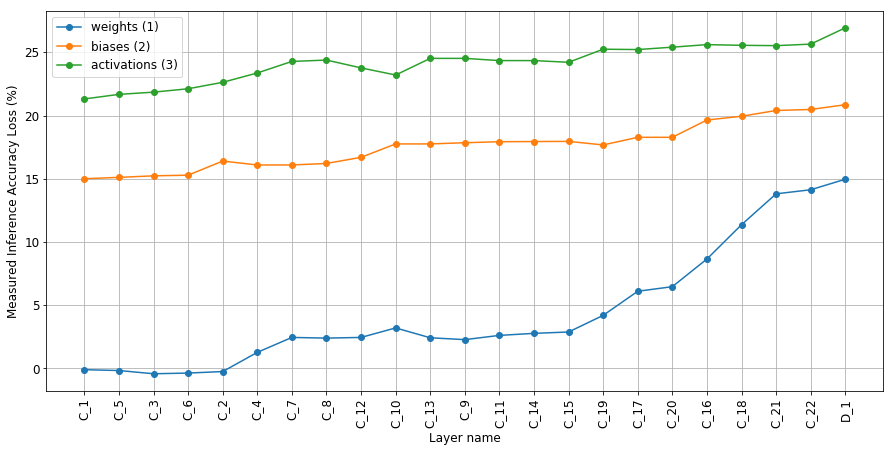

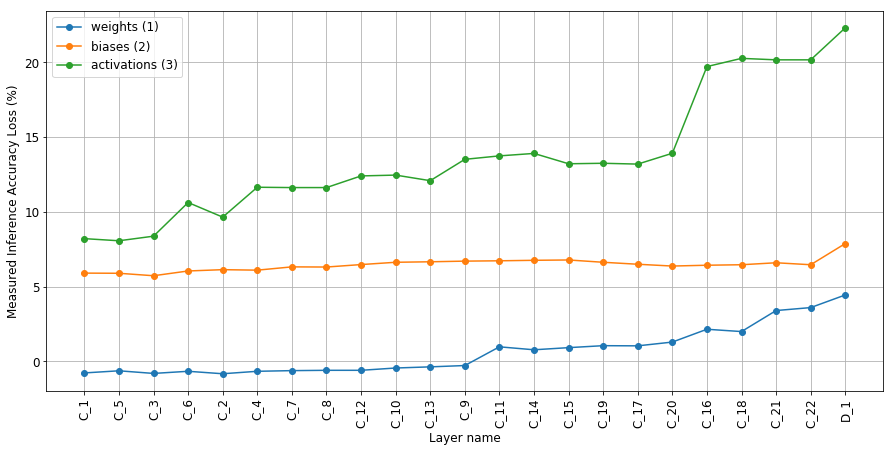

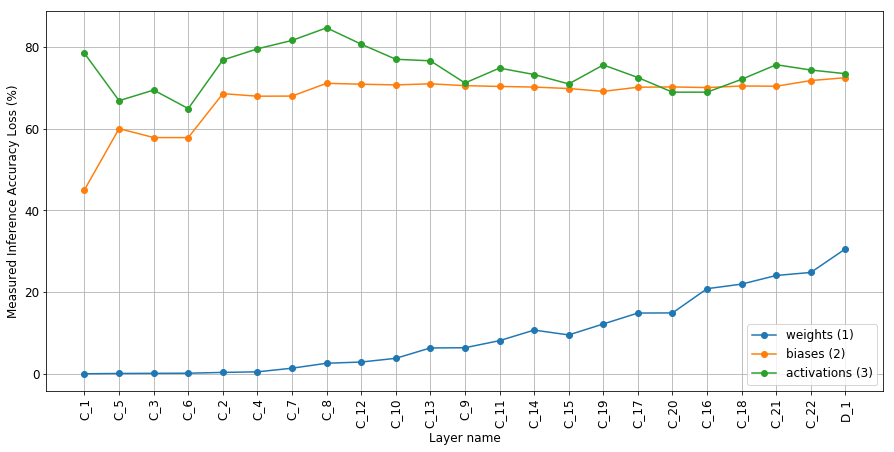

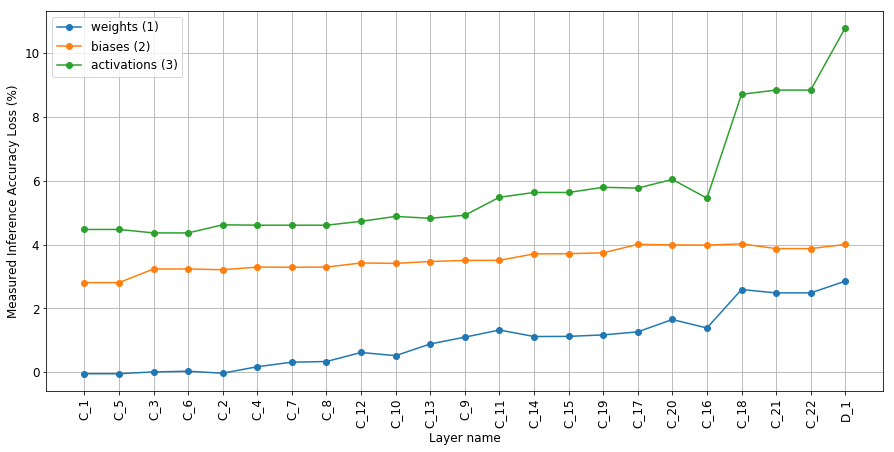

In [11]:
for m in models[:4]:
    plot_seq_acc_drop(acc_drop, m)

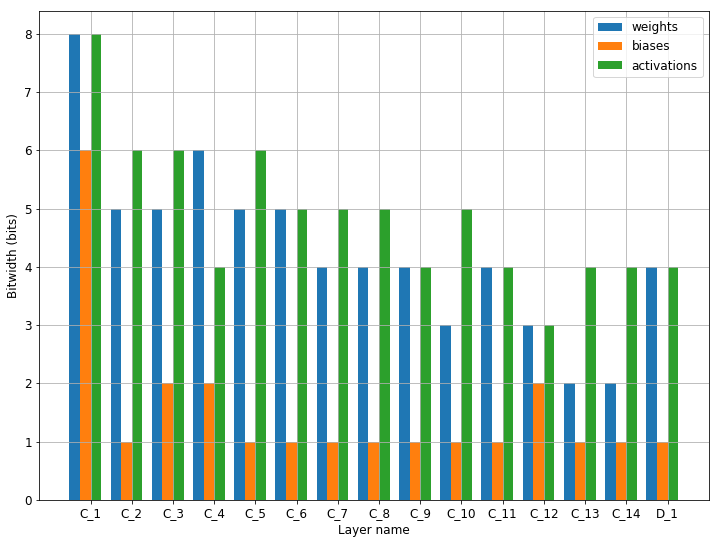

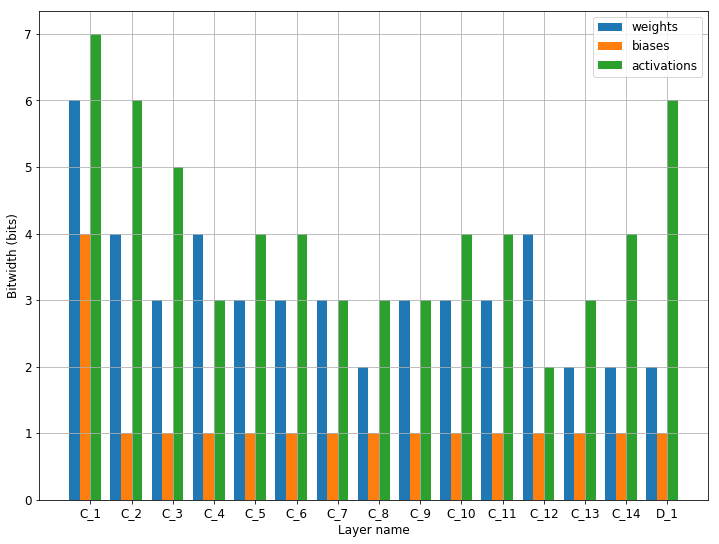

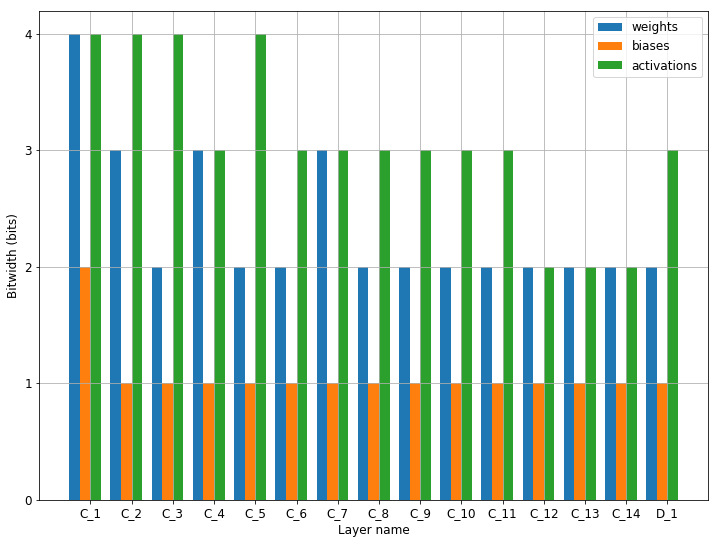

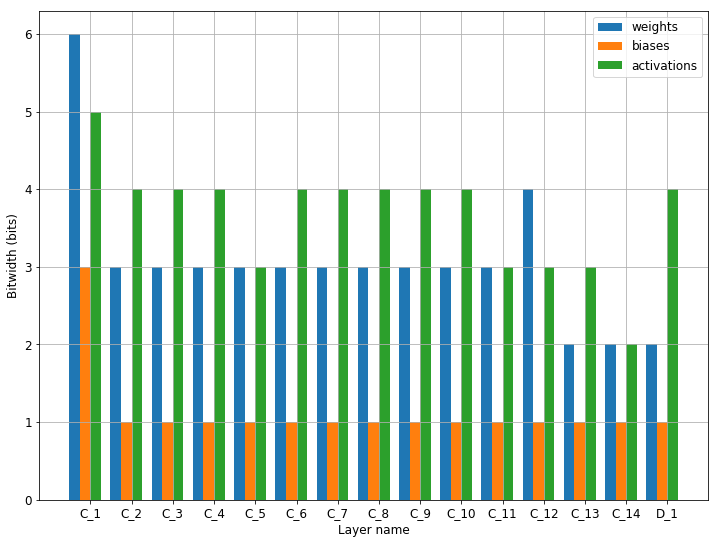

In [16]:
for m in models[4:]:
    plot_bw(opt_params, m)

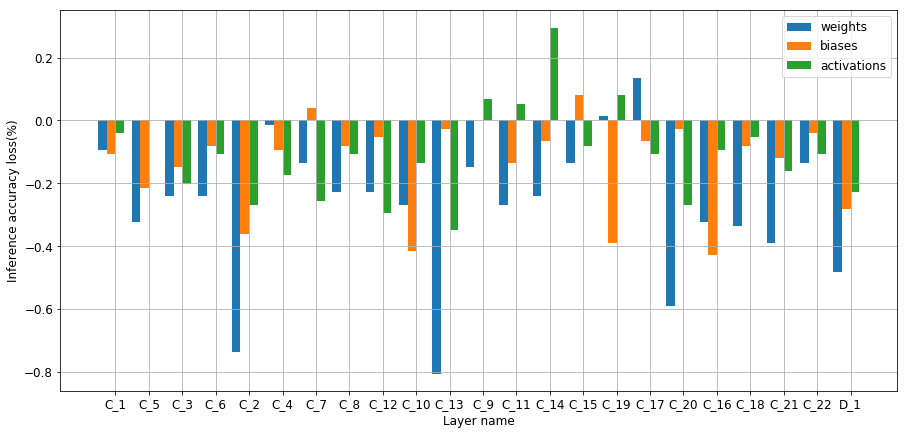

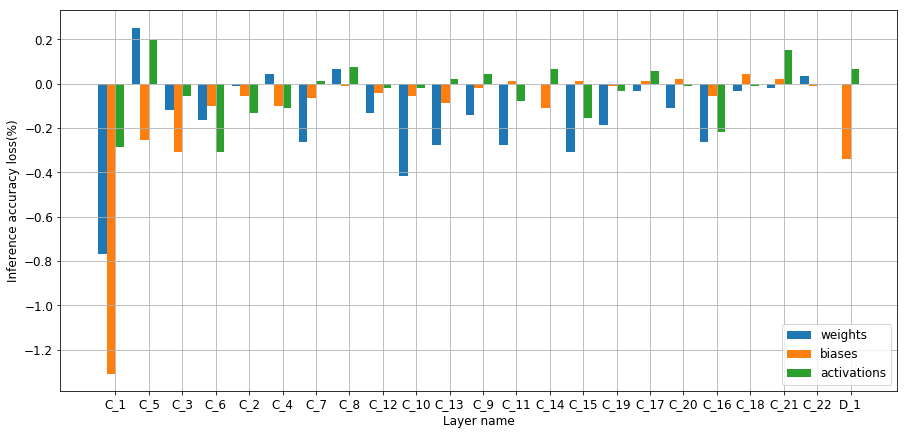

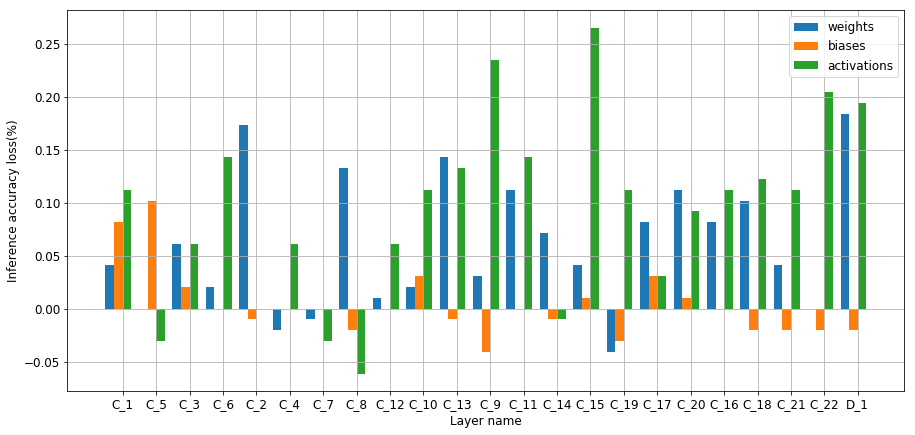

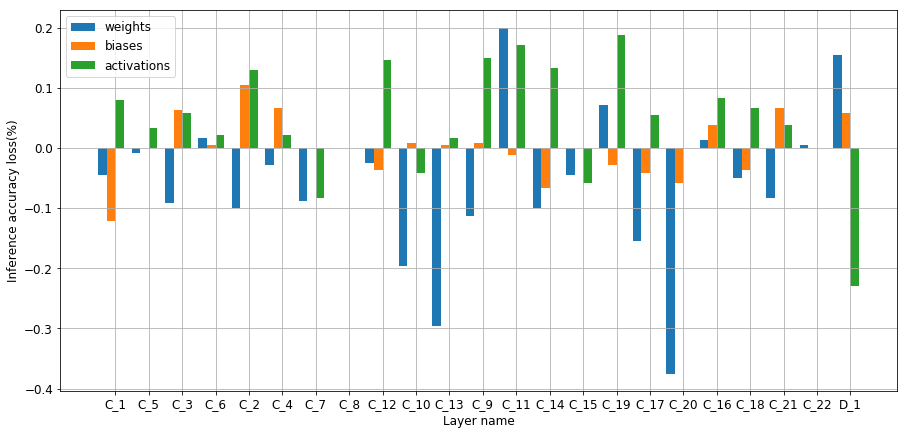

In [13]:
for m in models[:4]:
    plot_ind_acc_loss(scores, opt_params, m)